# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

# Git Exercise
In this exercise you will also experience working with github.

You might need to install local python enviroment.
Installation Instruction for ex2 - working on a local python environment:
https://docs.google.com/document/d/1G0rBo36ff_9JzKy0EkCalK4m_ThNUuJ2bRz463EHK9I

## please add the github link of your work below:


example: https://github.com/username/exercise_name

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

## Ordinary Least Square - starting here

Q: Get the boston housing dataset by using the scikit-learn package. hint: load_boston

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
%matplotlib inline

RANDOM_SEED = 101

def get_data():
    from sklearn.datasets import load_boston
    boston_dataset = load_boston()
    X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names).values
    y = boston_dataset.target
    return X, y

In [90]:
def mean_squared_error(y_pred, y_test):
  mse = (np.square(y_test - y_pred)).mean().astype('float128')
  return mse

In [91]:
# a = np.array([[1,2],[1,1]])
# b = np.array([[1,0],[0,1]])
# print(mean_squared_error(a,b))
# print(bla_mean_squared_error(a,b))

Q: What is  𝑝 ? what is  𝑛  in the above notation? hint: shape

In [92]:
X, y = get_data()
n = X.shape[0]
p = X.shape[1]
print(f'n = {n}')
print(f'p = {p}')

n = 506
p = 13


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Q: write a model OrdinaryLinearRegression which has a propoery  𝑤  and 3 methods: fit, predict and score (which returns the MSE on a given sample set). Hint: use numpy.linalg.pinv to be more efficient.

In [93]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

        
class Ols(object):
    
    def __init__(self):
        self.w = None
        
    @staticmethod
    def pad(X):
        n = X.shape[0]
        pad = np.ones((n, 1))
        return np.concatenate((pad, X), axis=1)
  
    def fit(self, X, Y):
        X = Ols.pad(X)
        self.w = np.linalg.pinv(self._fit(X, Y)) @ X.T @ Y
    
    def _fit(self, X, Y):
        return X.T @ X 
    
    def predict(self, X):
        X = Ols.pad(X)
        return X @ self.w.T

    def _predict(self, X):
        # optional to use this
        pass
    
    def score(self, X, Y):
        y_pred = self.predict(X)
        return mean_squared_error(Y, y_pred)


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

Q: Fit the model. What is the training MSE?

In [95]:
ols_model = Ols()
ols_model.fit(X_train, y_train)

In [96]:
mse_ols = ols_model.score(X_test, y_test)
print(f'The mse of our implementation {mse_ols}')

The mse of our implementation 33.268918558104176


In [97]:
def compare_to_sklearn_LinearRegression():
    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_pred_sklearn = lm.predict(X_test)
    mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
    print(f'The mse of sklearn implementation {mse_sklearn}')

compare_to_sklearn_LinearRegression()


The mse of sklearn implementation 33.2689185579199


Q: Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

Text(0, 0.5, 'Predicted Y')

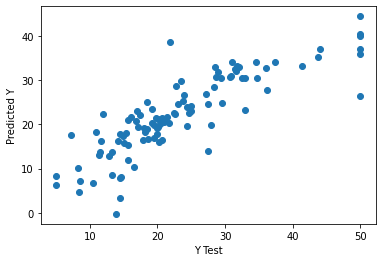

In [98]:
y_pred = ols_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Q: Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

In [99]:

def get_mse_train_test(num_of_iterations=20):
    X_cv, y_cv = X, y
    mse_arr_train_cv = []
    mse_arr_test_cv = []
    rs = ShuffleSplit(n_splits=num_of_iterations, random_state=RANDOM_SEED, test_size=0.25, train_size=None)

    for i, (train_index, test_index) in enumerate(rs.split(X)):
        ols_model_cv = Ols()
        X_train_cv = X_cv[train_index]
        y_train_cv = y_cv[train_index]

        X_test_cv = X_cv[test_index]
        y_test_cv = y_cv[test_index]

        ols_model_cv.fit(X_train_cv, y_train_cv)

        mse_ols_train_cv = ols_model_cv.score(X_train_cv, y_train_cv)
        mse_arr_train_cv.append(mse_ols_train_cv)

        mse_ols_test_cv = ols_model_cv.score(X_test_cv, y_test_cv)
        mse_arr_test_cv.append(mse_ols_test_cv)
    return mse_arr_train_cv, mse_arr_test_cv

mse_ols_train_cv, mse_arr_test_cv = get_mse_train_test()
print(f'the avg MSE of train is {np.mean(mse_ols_train_cv)}')
print(f'the avg MSE of test is {np.mean(mse_arr_test_cv)}')

the avg MSE of train is 21.38569415396384
the avg MSE of test is 24.499635911211417


Q: * Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 


In [100]:
from scipy import stats
np.random.seed(RANDOM_SEED)

# n_samples = 1000
# mse_ols_train_cv = get_mse_train_test(n_samples)[0]
# mse_arr_test_cv = get_mse_train_test(n_samples)[1]
# mse_ols_train_cv, mse_arr_test_cv = get_mse_train_test()
p_value = stats.ttest_rel(mse_ols_train_cv, mse_arr_test_cv)[1]
print(p_value)

0.004273134886224433


In [101]:
from sklearn.preprocessing import normalize

In [102]:
# Write a new class OlsGd which solves the problem using gradinet descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
class Normalizer():
    def __init__(self):
        pass 

    def fit(self, X): # todo
        # self.m = np.mean(X, axis=0)
        # self.s = np.std(X, axis=0)
        pass
     
    def predict(self, X):
        # return (X-self.m) / self.s
        return normalize(X)
    
class OlsGd(Ols):
    def __init__(self, learning_rate=.05, 
               num_iteration=1000, 
               normalize=True,
               early_stop=True,
               verbose=True):
    
        super(OlsGd, self).__init__()
        self.learning_rate = learning_rate
        self.num_iteration = num_iteration
        self.early_stop = early_stop
        self.normalize = normalize
        self.normalizer = Normalizer()    
        self.verbose = verbose

    def _fit(self, X, Y, reset=True, track_loss=True):
        if self.normalize:
          self.normalizer.fit(X)
          X = self.normalizer.predict(X)
        X = self.pad(X)
        self.w = X[np.random.randint(X.shape[0] - 1)]
        for i in range(self.num_iteration):
            w_div = self._step(X, Y)
            self.w = self.w - ((self.learning_rate * (1/X.shape[0])) * w_div)
        return
    
    def _predict(self, X):
    #remeber to normalize the data before starting
        if self.normalize:
          self.normalizer.fit(X)
          X = self.normalizer.predict(X)
        return self.predict(X)
    
    def _step(self, X, Y):
    # use w update for gradient descent
        return X.T @ (( X @ self.w) - Y)


Q - Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.

In [103]:
def plot_with_respect_to_iter(num_iteration):
    alphas = np.linspace(0.05, 1, 100)
    res_arr = []
    for alpha in alphas:
        olsGd_model = OlsGd(alpha, num_iteration = num_iteration)
        olsGd_model._fit(X_train, y_train)
        mse = olsGd_model.score(X_test, y_test)
        res_arr.append([alpha, mse])
    res = np.array(res_arr)
    plt.plot(res[:, :1], res[:, 1:])
    plt.xlabel("alpha")
    plt.ylabel("mse")
    plt.title(f"mse using {num_iteration} iterartions")
    plt.show()

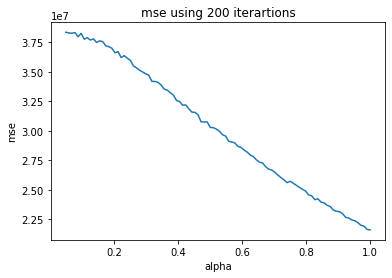

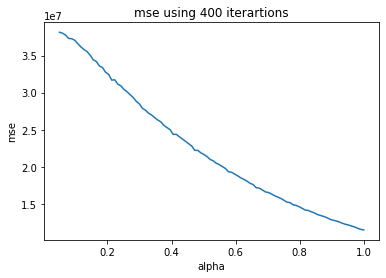

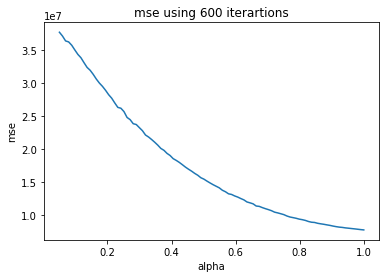

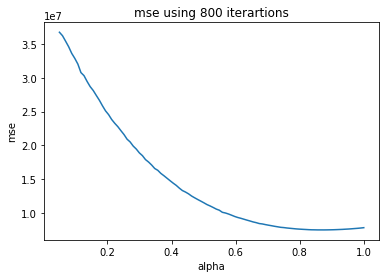

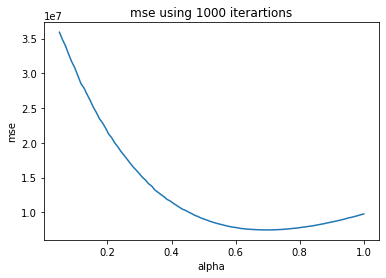

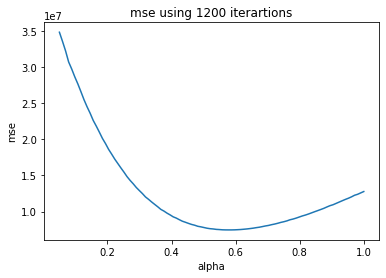

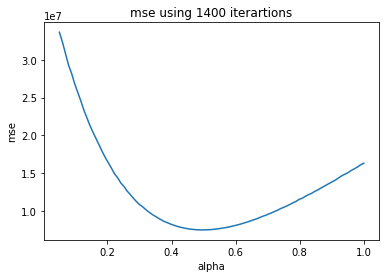

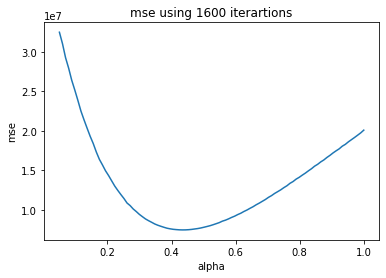

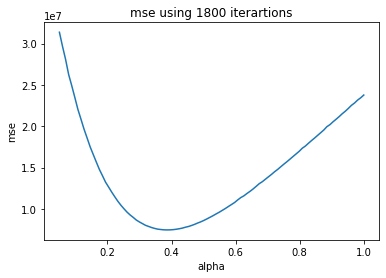

In [104]:
num_iteration_arr = np.arange(1, 10) * 200
for i in num_iteration_arr:
    plot_with_respect_to_iter(i)

Q - What is the effect of learning rate? 

The combination of a large num_iteration and a large alpha causes us to miss / go beyond the minimal point of W.
On the other hand, when using a small num_iteration and a small alpha we are very far from the the minimum of W, and we're going towards it too slow.

Q - How would you find number of iteration automatically?

Both alpha and number of iteration are hyper-params, and we should find them using the **validatoin** set.
Meaning, we should take our train data, split it to train & validation, find the hyper params that are minimizing the MSE and the, use the alpha and hyper number of itterations which led to this MSE. 

## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



Q - * Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$

we saw in class - diffrentiating 
$(1/2) * \sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} $ 
by w =  
$ X^T(Xw - y)$
and diffrentiating
$(1/2) * \sum_{i=1}^{i=N}\lambda \left\Vert w \right\Vert_2^2$ by w = lambda * w =>
X.T(Xw-y) + lambda * w = 0 
<=>
X.T*X*w - X.T*y + labda * w = 0 
<=>
X.T*X*w + labda * w = X.T*y 
<=>
(X.T*X + lambda * ide_mat) * w = X.T*y 
<=> *
w = inv(X.T*X + lambda * ide_mat) * X.T*y 
* assuming inv(X.T*X + lambda * ide_mat) exists

Q - Change OrdinaryLinearRegression and OrdinaryLinearRegressionGradientDescent classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.

In [105]:
class RidgeLs(Ols):
    def __init__(self, ridge_lambda, *wargs, **kwargs):
        super(RidgeLs,self).__init__(*wargs, **kwargs)
        self.ridge_lambda = ridge_lambda
    
    def _fit(self, X, Y):
        #Closed form of ridge regression
        return X.T @ X + self.ridge_lambda * np.identity(X.shape[1])
    

In [106]:
class RidgeLsGd(OlsGd):
    def __init__(self, ridge_lambda, *wargs, **kwargs):
        super(RidgeLsGd,self).__init__(*wargs, **kwargs)
        self.ridge_lambda = ridge_lambda
    
    def _step(self, X, Y):
    # use w update for gradient descent
        return (X.T @ (( X @ self.w) - Y)) + (self.ridge_lambda * self.w)

In [107]:
ridge_model = RidgeLs(0.2)
ridge_model.fit(X_train, y_train)

mse_ridge_model = ridge_model.score(X_test, y_test)
print(f'The mse of our RidgeLs implementation {mse_ridge_model}')

The mse of our RidgeLs implementation 33.91448976327217


In [108]:
ridge_gd_model = RidgeLsGd(0.1
                           , learning_rate=.05
                           , num_iteration=2
                          )
ridge_gd_model._fit(X_train, y_train)

mse_ridge_gd_model = ridge_gd_model.score(X_test, y_test)
print(f'The mse of our RidgeLsGd implementation {mse_ridge_gd_model}')

The mse of our RidgeLsGd implementation 2533139.0584954284


### Use scikitlearn implementation for OLS, Ridge and Lasso

## OLS

In [109]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred_sklearn = lm.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f'The mse of sklearn implementation {mse_sklearn}')


The mse of sklearn implementation 33.2689185579199


## Ridge

In [111]:
from sklearn.linear_model import Lasso
lm = Lasso(0.2)
lm.fit(X_train,y_train)
y_pred_sklearn = lm.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f'The mse of sklearn implementation {mse_sklearn}')


The mse of sklearn implementation 34.58149411697114


## Lasso

In [112]:
from sklearn.linear_model import Ridge
lm = Ridge(0.6)
lm.fit(X_train,y_train)
y_pred_sklearn = lm.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f'The mse of sklearn implementation {mse_sklearn}')

The mse of sklearn implementation 33.65227126437283
